In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/Musoloo/Data-Mining-Week-1_Benito-Priyasha/refs/heads/main/adult.csv')
df.sample(n=10)

# pd.read_csv digunakan untuk read file dengan format csv
# sample(n=10) digunakan untuk menampilkan data random dari dataset sebanyak 10 row

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
24101,30,Private,308812,Some-college,10,Never-married,Sales,Not-in-family,White,Female,0,0,60,United-States,<=50K
33812,21,?,121694,7th-8th,4,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
44168,23,Private,455361,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,Guatemala,<=50K
38377,36,Private,123151,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K
6767,54,Private,227392,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
8499,41,Self-emp-not-inc,230961,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
15508,23,Private,51973,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0,0,50,Japan,<=50K
34643,22,?,287988,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,15,United-States,<=50K
20468,30,Private,98733,Some-college,10,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
28939,44,Private,172025,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,38,United-States,<=50K


In [17]:
df.info()
# info() digunakan untuk menunjukkan berapa jumlah data pada dataset serta data typenya dan juga jumlah non-null pada tiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [18]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
df.isnull().sum()
# isnull().sum() digunakan untuk menunjukkan data yang kosong (null), dan pada dataset ini tidak ada data yang null

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


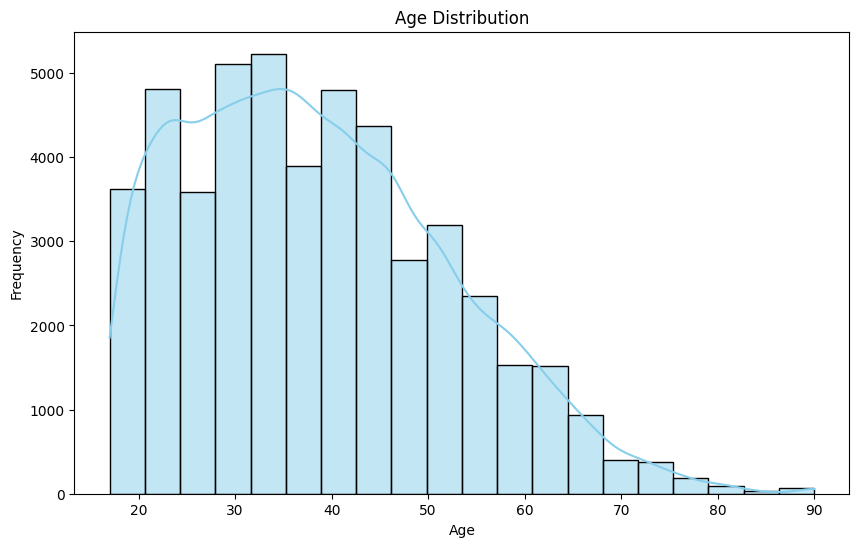

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# This visualization will help us understand the age distribution in the dataset and observe which age groups are more common.

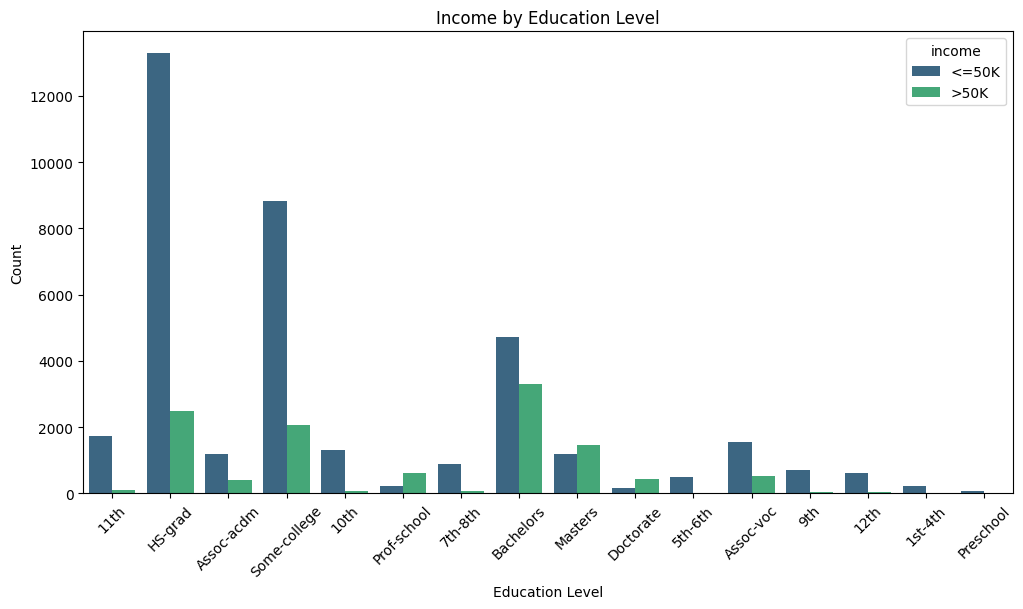

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income', palette='viridis')
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# This plot will compare income levels based on educational backgrounds, showing how education correlates with income (<=50K and >50K).

<ipython-input-22-be1ae2b0e70e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='occupation', y='hours-per-week', palette='muted')


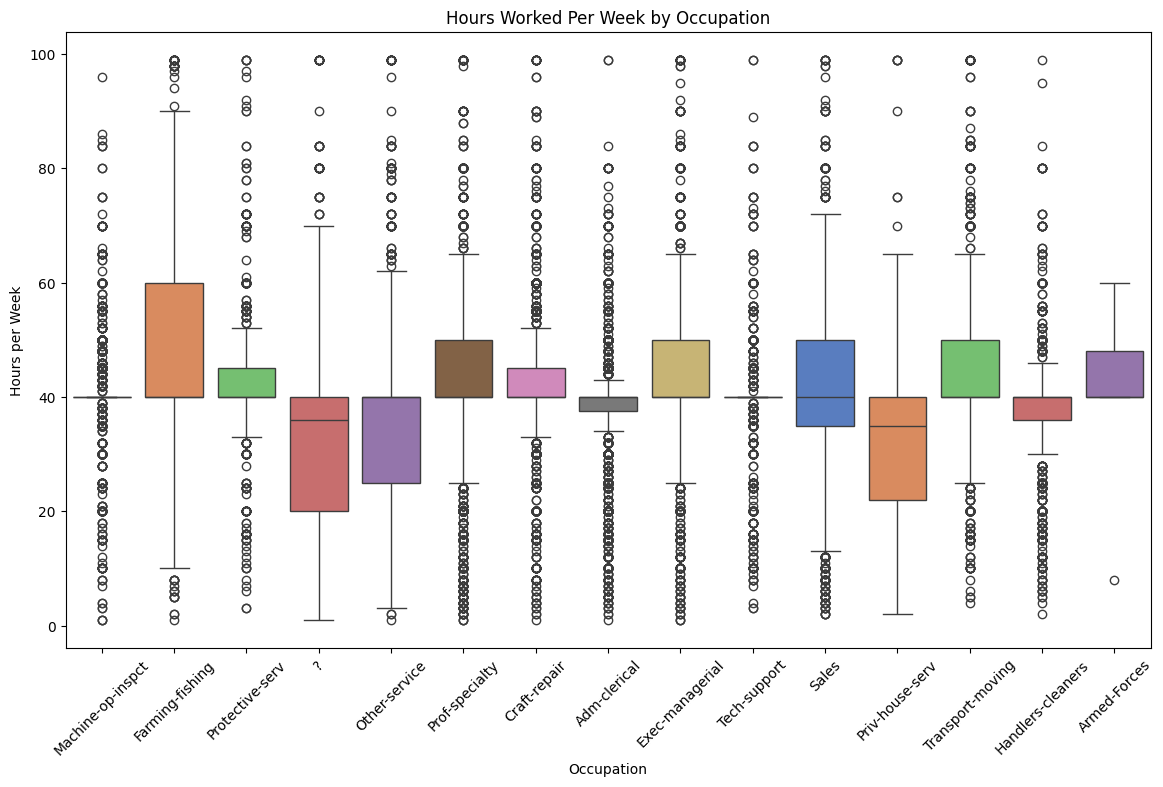

In [22]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='occupation', y='hours-per-week', palette='muted')
plt.title('Hours Worked Per Week by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Hours per Week')
plt.xticks(rotation=45)
plt.show()

# This box plot will show the range and average of hours worked per week across different occupations, highlighting any variations between job types.

In [25]:
label_encoder = LabelEncoder()

# List of columns to encode (categorical columns)
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataset
print(df.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  226802          1                7               4   
1   38          4   89814         11                9               2   
2   28          2  336951          7               12               2   
3   44          4  160323         15               10               2   
4   18          0  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1             0             0   
2          11             0     4       1             0             0   
3           7             0     2       1          7688             0   
4           0             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              50              39 

In [26]:
X = df.drop('income', axis=1)
y = df['income']
# y merupakan data yang menjadi target, dan X merupakan variabel-variabel yang akan mempengaruhi hasil dari y

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# memisah data menjadi train dan test, train memiliki 80% data dan test sisanya, lalu random state yang dipakai adalah 42

In [28]:
X_train.shape,X_test.shape
# memeriksa dimensi train data dan test data, memastikan bahwa pembagian data sudah sesuai dan data memiliki jumlah fitur yang sama.

((39073, 14), (9769, 14))

In [29]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state = 0)
dt_entropy.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria entropy, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [30]:
y_pred_entropy = dt_entropy.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_entropy) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_entropy

In [31]:
print(f"Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_entropy)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_entropy

Model accuracy score with criterion entropy: 0.8449175964786569


In [32]:
print("Training set score (Entropy): ", dt_entropy.score(X_train, y_train))
print("Test set score (Entropy): ", dt_entropy.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_entropy

Training set score (Entropy):  0.8383538504849897
Test set score (Entropy):  0.8449175964786569


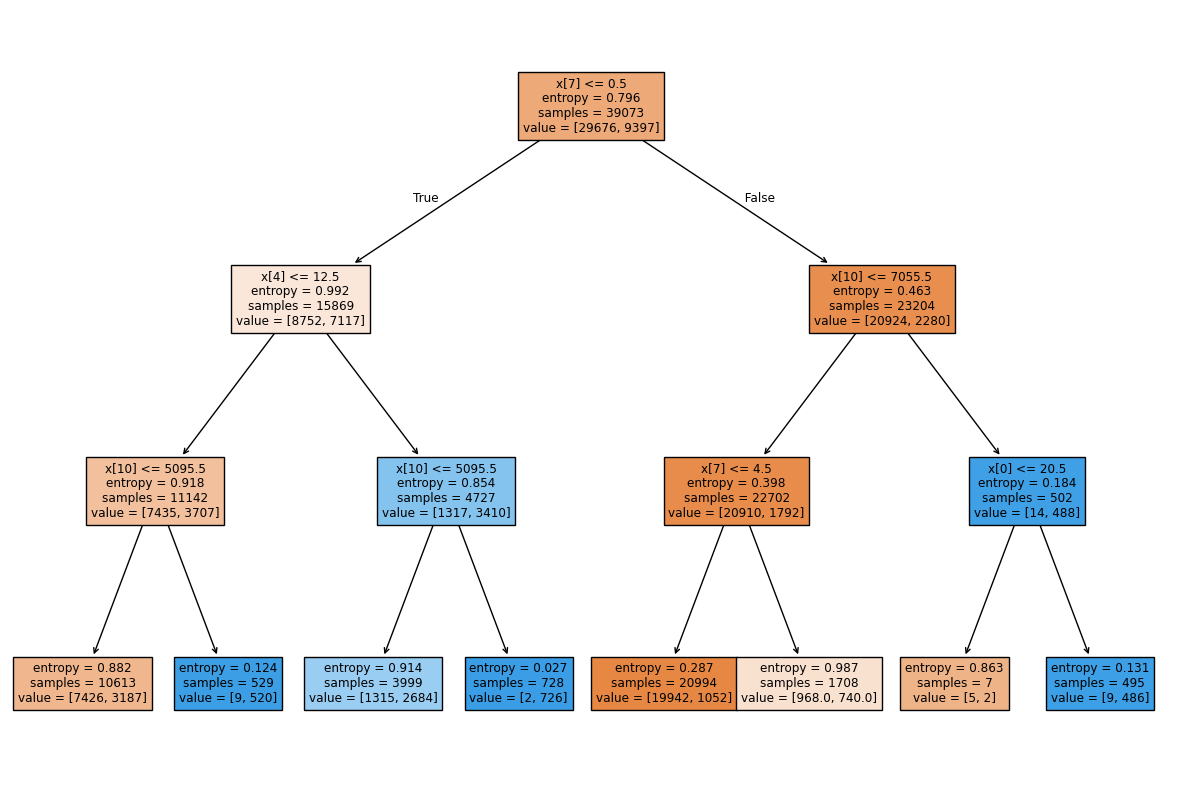

In [33]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_entropy, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_entropy dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

In [34]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt_gini.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria Gini Index, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train

DecisionTreeClassifier(max_depth=3, random_state=0)

In [35]:
y_pred_gini = dt_gini.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_gini) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_gini

In [36]:
print(f"Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_gini

Model accuracy score with criterion gini index: 0.8449175964786569


In [37]:
print("Training set score (Gini Index): ", dt_gini.score(X_train, y_train))
print("Test set score (Gini Index): ", dt_gini.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_gini

Training set score (Gini Index):  0.8383538504849897
Test set score (Gini Index):  0.8449175964786569


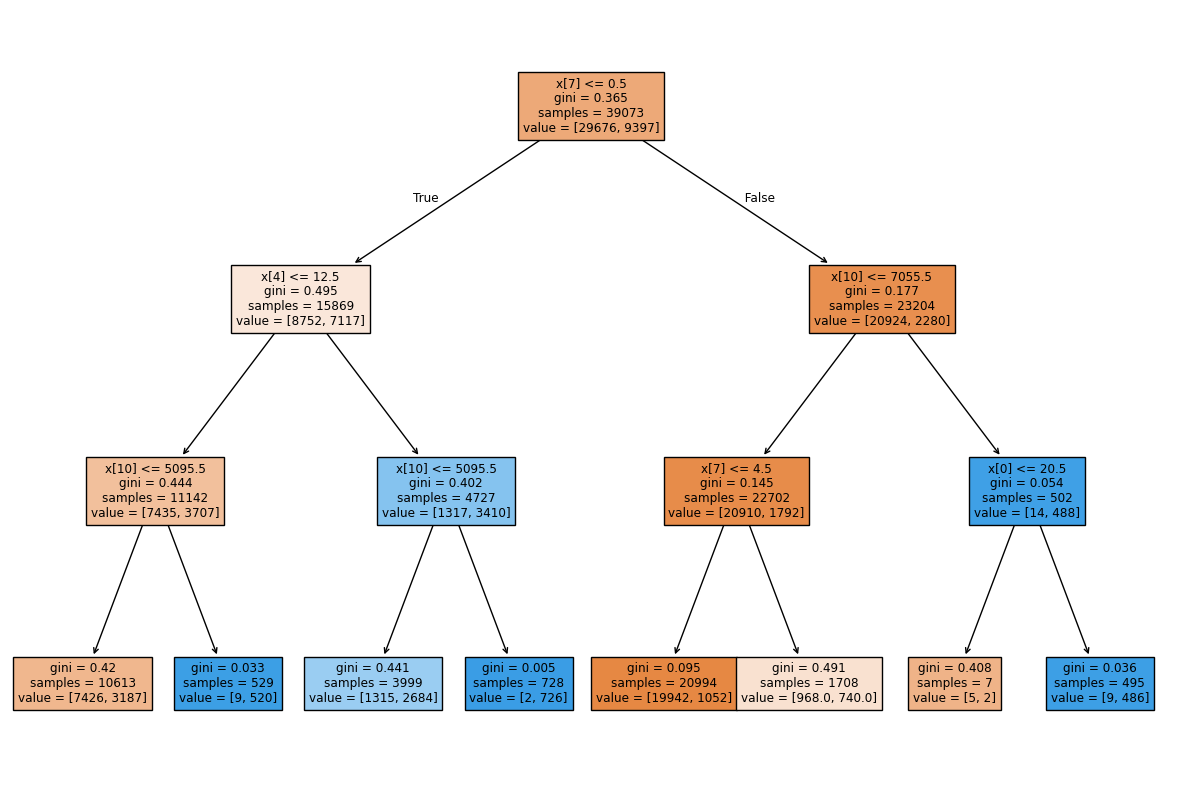

In [38]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_gini, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_gini dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

In [39]:
print("Confusion Matrix Entropy\n",confusion_matrix(y_test, y_pred_entropy))
print("Confusion Matrix Gini Index\n",confusion_matrix(y_test, y_pred_gini))
# Code ini akan menampilkan dua confusion matrix, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Confusion Matrix Entropy
 [[7136  343]
 [1172 1118]]
Confusion Matrix Gini Index
 [[7136  343]
 [1172 1118]]


In [40]:
print("Classification Report Entropy\n",classification_report(y_test, y_pred_entropy))
print("Classification Report Gini Index\n",classification_report(y_test, y_pred_gini))
# Code ini akan menampilkan dua Classification Report, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Classification Report Entropy
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

Classification Report Gini Index
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



In [42]:
# Perbandingan antara penggunaan entropi dan indeks Gini sebagai kriteria pembelahan pada decision tree menunjukkan hasil yang serupa.
# Hal ini mengindikasikan bahwa kedua kriteria tersebut memberikan hasil yang tidak jauh berbeda pada dataset ini.

In [43]:
nb = GaussianNB()
# Code di atas digunakan untuk membuat model Naive Bayes Gaussian.
nb.fit(X_train, y_train)
# Code di atas digunakan untuk melatih model menggunakan data pelatihan X_train dan y_train.

GaussianNB()

In [44]:
y_pred_nb = nb.predict(X_test)
# Code tersebut menggunakan model Naive Bayes untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_nb

In [45]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_nb))
# Code ini akan menampilkan confusion matrix untuk model Naive Bayes
print("Accuracy Score: ",accuracy_score(y_test, y_pred_nb))
# Code ini akan menampilkan accuracy score untuk model Naives Bayes

Confusion Matrix
 [[7099  380]
 [1580  710]]
Accuracy Score:  0.7993653393387246


In [46]:
print("Classification Report Naive Bayes\n",classification_report(y_test, y_pred_nb))
# Code ini akan menampilkan Classification report untuk model Naive Bayes

Classification Report Naive Bayes
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [ ]:
# # Hasil klasifikasi menunjukkan bahwa model Naive Bayes mampu memprediksi kelas 0 dengan akurasi yang cukup baik, terlihat dari nilai presisi, recall, dan F1-score yang mendekati 0.8.
# Namun, model kurang optimal dalam memprediksi kelas 1, dengan nilai metrik yang sedikit lebih rendah.
# Secara keseluruhan, model mencapai akurasi sekitar 77% dalam mengklasifikasikan data.

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
# Code tersebut mengimpor, membuat, dan melatih model Logistic Regression menggunakan data pelatihan untuk memprediksi target.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [48]:
y_pred_log = model.predict(X_test)
# Code tersebut menggunakan model Logistic Regression untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_log

In [49]:
# Displaying the confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_log))
# Code ini akan menampilkan confusion matrix untuk model Logistic Regression
print("Accuracy Score Logistic: ",accuracy_score(y_test, y_pred_log))
# Code ini akan menampilkan accuracy score untuk model Logistic Regression

Confusion Matrix:
 [[7079  400]
 [1453  837]]
Accuracy Score Logistic:  0.8103183539768656


In [50]:
print('Classification Report Logistic:\n',classification_report(y_test, y_pred_log))
# Code ini akan menampilkan Classification report untuk model Logistic Regression

Classification Report Logistic:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      7479
           1       0.68      0.37      0.47      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.66      0.68      9769
weighted avg       0.79      0.81      0.79      9769



In [ ]:
# The model performs well in identifying Class 0, with high precision, recall, and F1-score, but struggles with Class 1, as indicated by lower precision, recall, and F1-score. This could suggest class imbalance or that the model has difficulty distinguishing Class 1.